In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import nltk
import ssl #CIFAR Failing

from nltk.classify.scikitlearn import SklearnClassifier
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.classify import SklearnClassifier
from nltk.stem import WordNetLemmatizer

from keras import regularizers
from keras import layers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds, eigs

C:\Users\GIGA\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\GIGA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\GIGA\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
%matplotlib inline

ssl._create_default_https_context = ssl._create_unverified_context #CIFAR Fix

plt.style.use("dark_background")
plt.rcParams["figure.figsize"] = 15, 15

# Task 1 Artificial Neural Network (40 Points)

## 1. Load the dataset (CIFAR – 10)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

## 2. Explain in your own words: (7 points)

### a. Gradient Descent (1 point)

In [4]:
# Gradient Descent is an algorithm which attempts to find the global minimum through an optimization method.
# In gradient descent we attempt to minimize some cost function as a means of finding an optimal value. It is
# important to note that, in gradient descent, our function must be differentiable. This is because we take 
# the derivative of the slope of the function in order to determine if we are approaching, at, or escaping 
# a minimum. This does not gauruntee to find the global minimum, but it does find a minimum.

### b. Drop out (1 point)

In [5]:
# Counterintuitively, dropping neurons can actually produce better models as a result of statistics. Drop out 
# can help in this increased performance as it can act as a way to nullify certain neurons in an attempt to 
# reduce the randomly produced noise from our data. We can think of this process as a way to induce the death
# of unused neurons, just as our own brains do.

### c. Activation functions (1 point)

In [6]:
# The idea of the activation function is to determine, based on the sum of the computed weights, whether a 
# specific neuron will fire or not. There are many different types of activation functions such as sigmoid,
# relu, and leaky relu. We can also alter our predicted outputs based on the activation function we use.

### d. Back Propagation (1 point)

In [7]:
# Back Propagation is a method used to adjust the weights of neurons based on gradient descent. Once a forward
# pass is conducted and we arrive at some prediction we can determine how accurate that model is. Then, 
# depending on the accuracy, we can back propagate through the network and adjust the weights to find a 
# better model. This process is crucial for finding each neurons optimal weights and what makes neural
# networks possible.

### e. Epochs, Iterations and Batch size (3 points)

In [8]:
# Epochs
# 
# Epochs are the total number of iterations we conduct through the data set. Specifically, in one epoch
# we pass through the training data exactly once.

# Iterations
# 
# Iterations are the total number of batches required to complete one epoch of data. 

# Batch Size
# 
# Batch Size is the total number of observation that are present in each training batch. 

## 3. Visualize / summarize the data (10 points)

### a. Number of entities in training and testing set and number of classes in target variable (1 point)

In [9]:
print("X_train dimensions: " + str(x_train.shape))
print("X_test dimensions: " + str(x_test.shape))
print("y_train dimensions: " + str(y_train.shape))
print("y_test dimensions: " + str(y_test.shape))

X_train dimensions: (50000, 32, 32, 3)
X_test dimensions: (10000, 32, 32, 3)
y_train dimensions: (50000, 1)
y_test dimensions: (10000, 1)


In [10]:
# 10 Total Variables

print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
x_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [14]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

### b. Number of pixels in the image (Height and width individually) (2 points)

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0
 
y_train, y_test = y_train.flatten(), y_test.flatten()

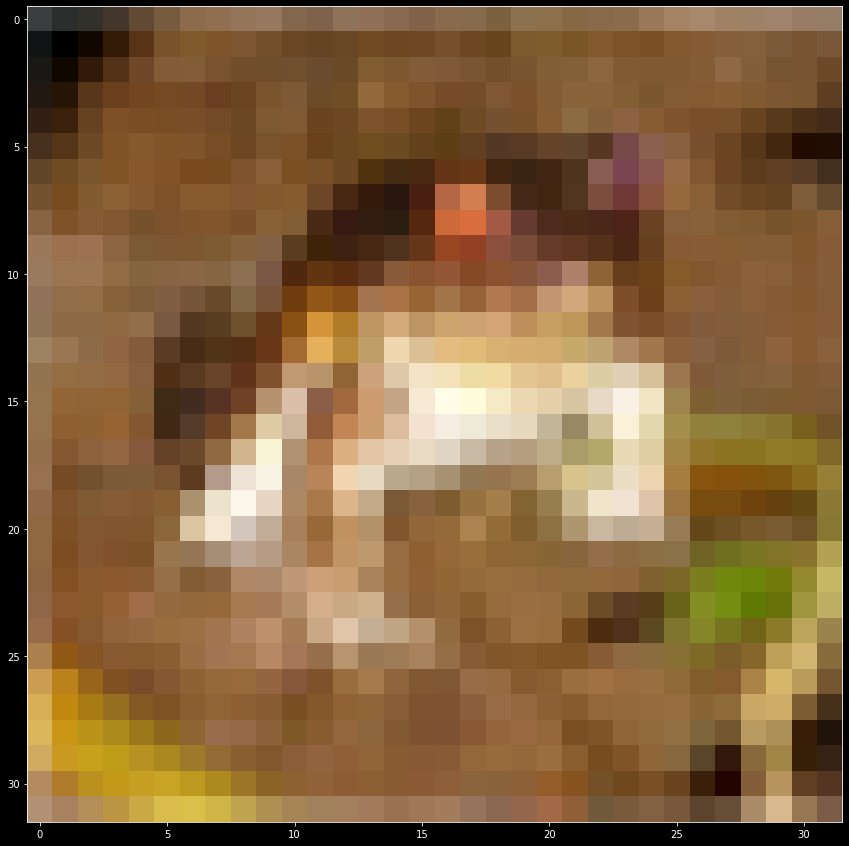

In [16]:
# We can see by the graph below that the height and width of each image is 32 pixels.

plt.imshow(x_train[0])

### c. Number of images per class (1 point)

In [17]:
# According to the documentation, "The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, 
# with 6000 images per class. There are 50000 training images and 10000 test images."

# 6000 per class

### d. Display at least 2 images of each class (6 points)

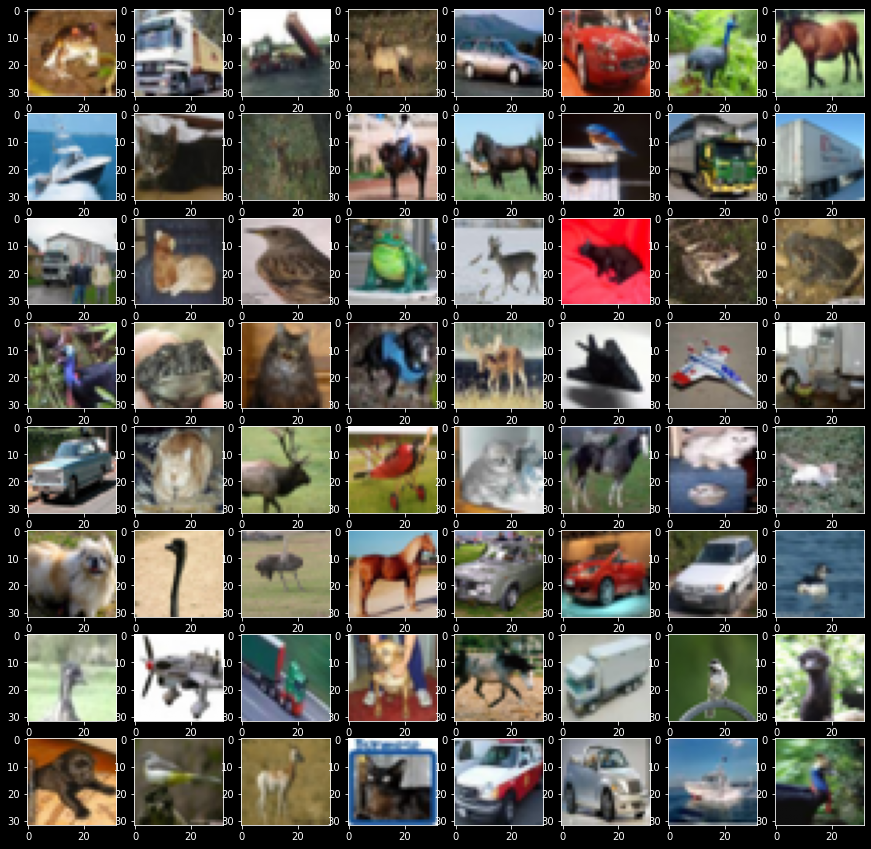

In [18]:
fig, ax = plt.subplots(8, 8)
i = 0
 
for j in range(8):
    for k in range(8):
        ax[j][k].imshow(x_train[i], aspect = 'auto')
        i += 1
 
plt.show()

## 4. Train a neural network (21 points)

### a. Decide number of layers and neurons in each layer (2 points)

In [19]:
# 32 pixels x 32 pixels  / 8 = 128 neurons first hidden layer
# 128 / 4 = 32 neurons second hidden layer
# 10 unique output neurons

def getModel(model, act0, act1, act2):
    model.add(Flatten(input_shape = (32, 32, 3)))
    model.add(Dense(128, activation = act0))
    model.add(Dense(32, activation = act1))
    model.add(Dense(10, activation = act2))
    return model

In [20]:
model = Sequential()
model = getModel(model, "selu", "selu", "sigmoid")

model.compile(optimizer = "Adamax", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1294 - accuracy: 0.1402
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7815 - accuracy: 0.3611
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6578 - accuracy: 0.4092
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5888 - accuracy: 0.4331
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5386 - accuracy: 0.4516


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


### b. Try out different activation functions (explain each one you used) (4 points)

In [22]:
# ReLU
# 
# ReLU is a rectified linear activation function. It consists of the following equation: max(0, x). It prevents the 
# activation function from outputting anything less than 0. ReLU helps prevent against weight saturation we normally
# find in sigmoid or tanh activation functions.

# sigmoid
# 
# The sigmoid is a linear activation function which always outputs values between 0 and 1. The sigmoid is often used 
# in the final layer due to its vanishing gradient properties.

# softmax
# 
# The softmax acitvation function outputs the realative probabilities for any given data sets output. This means that it 
# calculates the most likely output for a given input and then selects that output as its prediction. It does this by
# ensuring all probabilities sum to 1 and picking the probability with the highest accuracy.

# SELU
# 
# SELU is a scaled exponential linear unit. It improves on ReLU and can avoid the saturation problems that still exist in
# ReLU. It is a non-linear function which acts linearly past 0. 

In [23]:
model = Sequential()
model = getModel(model, "relu", "relu", "sigmoid")

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.1525 - accuracy: 0.2041
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9381 - accuracy: 0.3112
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8579 - accuracy: 0.3499
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8145 - accuracy: 0.3647
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7834 - accuracy: 0.3783


In [24]:
model = Sequential()
model = getModel(model, "relu", "relu", "softmax")

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0029 - accuracy: 0.2840
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8553 - accuracy: 0.3468
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8051 - accuracy: 0.3678
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7727 - accuracy: 0.3803
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7490 - accuracy: 0.3902


In [25]:
model = Sequential()
model = getModel(model, "selu", "selu", "sigmoid")

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9789 - accuracy: 0.2855
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8242 - accuracy: 0.3563
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7756 - accuracy: 0.3774
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7470 - accuracy: 0.3882
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7235 - accuracy: 0.3987


In [26]:
model = Sequential()
model = getModel(model, "selu", "selu", "softmax")

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9402 - accuracy: 0.3062: 0s - loss: 1.9428 - accuracy: 
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8109 - accuracy: 0.3626
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7678 - accuracy: 0.3818
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7396 - accuracy: 0.3920
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7195 - accuracy: 0.3997


### c. Try with and without using drop out (4 points)

In [27]:
# Without Droup Out

model = Sequential()

model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(128, activation = "selu"))
model.add(Dense(32, activation = "selu"))
model.add(Dense(10, activation = "sigmoid"))

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9860 - accuracy: 0.2873
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8226 - accuracy: 0.3616
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7760 - accuracy: 0.3798
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7480 - accuracy: 0.3932
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7270 - accuracy: 0.4007


In [28]:
# With Drop Out

model = Sequential()

model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(128, activation = "selu"))
model.add(Dropout(.1))
model.add(Dense(32, activation = "selu"))
model.add(Dense(10, activation = "sigmoid"))

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0508 - accuracy: 0.2531
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8782 - accuracy: 0.3323
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8370 - accuracy: 0.3526
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8119 - accuracy: 0.3617
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7931 - accuracy: 0.3690


In [29]:
# Droupout is a method which drops neruons in an attempt to increase accuracy by introducing a type of noise. 
# This noise acts to create a more robust model and is a type of regularization.

# We can see that using dropout here actually decreases accuracy.

### d. Try different regularizations apart from drop out (4 points)

In [30]:
# In this cell we use L2 for kernal regularization and L1 for activity regularization

model = Sequential()

model.add(Flatten(input_shape = (32, 32, 3)))
model.add(layers.Dense(256, activation = tf.keras.activations.selu, 
                       kernel_regularizer = regularizers.l2(0.01), 
                       activity_regularizer = regularizers.l1(0.01)))
model.add(Dense(128, activation = "selu"))
model.add(Dropout(.1))
model.add(Dense(32, activation = "selu"))
model.add(Dense(10, activation = "sigmoid"))

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 6.9647 - accuracy: 0.2689
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 6.1454 - accuracy: 0.3212
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 5.6541 - accuracy: 0.3373
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 5.2935 - accuracy: 0.3521
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 5.0148 - accuracy: 0.3592


In [31]:
# In this cell we use L1 for kernal regularization and L2 for activity regularization

model = Sequential()

model.add(Flatten(input_shape = (32, 32, 3)))
model.add(layers.Dense(256, activation = tf.keras.activations.selu, 
                       kernel_regularizer = regularizers.l1(0.01), 
                       activity_regularizer = regularizers.l2(0.01)))
model.add(Dense(128, activation = "selu"))
model.add(Dropout(.1))
model.add(Dense(32, activation = "selu"))
model.add(Dense(10, activation = "sigmoid"))

model.compile(optimizer = "Adagrad", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 8s 5ms/step - loss: 65.2391 - accuracy: 0.2537
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 4.5254 - accuracy: 0.2175
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3930 - accuracy: 0.1762
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3212 - accuracy: 0.1869
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2796 - accuracy: 0.1971


### e. Try different optimization algorithms (such as Gradient Descent, Adam etc.) (4 points)

In [32]:
# Adam
# 
# Adam is a moment based gradient optimizer. It essential adapts to the current gradient by remember past gradient values.
# Adam is commonly used.

model = Sequential()
model = getModel(model, "selu", "selu", "sigmoid")

model.compile(optimizer = "Adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2823 - accuracy: 0.0997
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.2670 - accuracy: 0.1004
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0914 - accuracy: 0.0959
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8667 - accuracy: 0.2789
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7274 - accuracy: 0.3670


In [33]:
# SGD
# 
# SGD is traditional stochastic gradient descent.

model = Sequential()
model = getModel(model, "selu", "selu", "sigmoid")

model.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 2s 2ms/step - loss: 1.9499 - accuracy: 0.2872
Epoch 2/5
1563/1563 [==============================] - 2s 2ms/step - loss: 1.7748 - accuracy: 0.3682
Epoch 3/5
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6900 - accuracy: 0.3994
Epoch 4/5
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6352 - accuracy: 0.4173
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5931 - accuracy: 0.4333


In [34]:
# Adamax
# 
# Adamax is a variation on adam which adjusts for norm.

model = Sequential()
model = getModel(model, "selu", "selu", "sigmoid")

model.compile(optimizer = "Adamax", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0853 - accuracy: 0.1218
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7659 - accuracy: 0.3662
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6556 - accuracy: 0.4099
Epoch 4/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5951 - accuracy: 0.4355
Epoch 5/5
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5426 - accuracy: 0.4526


### f. Create a graph of f1 score vs epochs for training and validation set. (2 points)

In [35]:
model = Sequential()
model = getModel(model, "selu", "selu", "sigmoid")

model.compile(optimizer = "Adamax", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"]) 
history = model.fit(x_train, y_train, epochs = 10)
y_pred = model.predict_classes(x_test)

Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 2.1364 - accuracy: 0.1052
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9316 - accuracy: 0.1004
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8612 - accuracy: 0.1047
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8006 - accuracy: 0.1892
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6156 - accuracy: 0.4165
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5408 - accuracy: 0.4469
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4970 - accuracy: 0.4624
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4597 - accuracy: 0.4771
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4283 - accuracy: 0.4892
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.400

[3 8 8 ... 5 1 7]
[3 8 0 ... 5 5 7]
[0.55849057 0.60539461 0.29680054 0.29924021 0.41997439 0.42
 0.5052755  0.52964119 0.60019743 0.4954792 ]


Text(0, 0.5, 'f1_score')

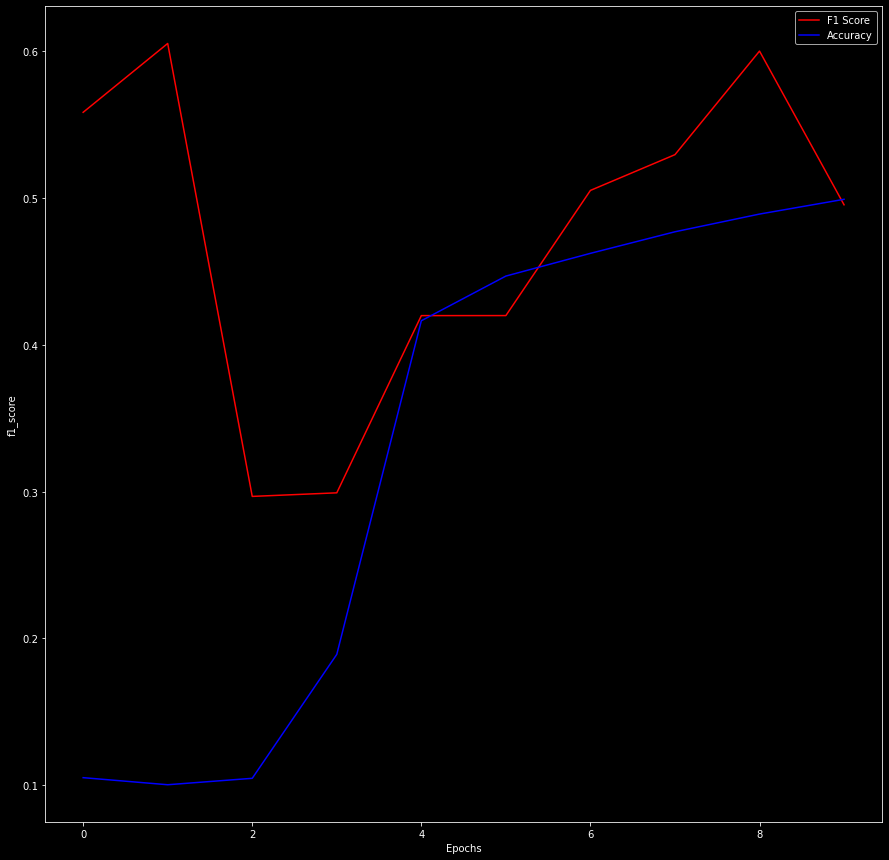

In [36]:
# plot accuracy during training

print(str(y_test))
print(str(y_pred))

val = f1_score(y_test, y_pred, average = None)

print(str(val))

plt.plot(val, label = "F1 Score", color = "r")
plt.plot(history.history["accuracy"], label = "Accuracy", color = "b")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("f1_score")

### g. Calculate number of trainable parameters in your final model. (1 point)

In [37]:
# Final parameter count is: 397,802


# Best Model:
#
# model.compile(optimizer = 'Adamax', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 
# model.fit(x_train, y_train, epochs = 10)

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_39 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                330       
Total params: 397,802
Trainable params: 397,802
Non-trainable params: 0
_________________________________________________________________


# Task 2 Natural Language Processing (20 Points)

### 1. Load the movie reviews sentiment analysis dataset and split into 80:20 ratio for training and test data (2 points)

In [38]:
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')
  
stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GIGA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GIGA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GIGA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
movieData = pd.read_csv("Sentiment Analysis Dataset.csv")
movieData

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [40]:
movieData.isnull().sum()

review       0
sentiment    0
dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(movieData["review"], 
                                                    movieData["sentiment"], test_size = 0.2, random_state = 0)

In [42]:
print("X_train dimensions: " + str(X_train.shape))
print("X_test dimensions: " + str(X_test.shape))
print("y_train dimensions: " + str(y_train.shape))
print("y_test dimensions: " + str(y_test.shape))

X_train dimensions: (40000,)
X_test dimensions: (10000,)
y_train dimensions: (40000,)
y_test dimensions: (10000,)


### 2. What is lexical vs semantic text analysis (3 points)

In [43]:
# Semantic
# 
# Semantic text analysis has to do with determining the meaning of a word and how it may be used. In this representation
# we look to analyize a word based on its multitude of meanings within the context of all sentences. In other words, it is
# understood not by its inherent meaning, but in its contextual meaning in reference to all other words.

# Lexical
# 
# Lexical text analysis regards associations between words based on a principal domain which oraganizes them. In this method
# we tokenize each value so that it can be represented with an intrinsic meaning. Here we separate each word and consider
# its value based on its use.

### 3. Perform required preprocessing on the dataset (removing stop words, vectorization etc.) (10 points)

In [44]:
# Gross preprocessing

X_train = X_train.to_frame()
X_test = X_test.to_frame()

In [45]:
X_train["review"] = X_train["review"].str.replace("<br/>", "", regex = True)
X_test["review"] = X_test["review"].str.replace("<br/>", "", regex = True)

X_train["review"] = X_train["review"].str.replace("[^a-zA-Z ]", "", regex = True)
X_test["review"] = X_test["review"].str.replace("[^a-zA-Z ]", "", regex = True)

X_train["review"] = X_train["review"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
X_test["review"] = X_test["review"].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))

In [46]:
lemmatizer = WordNetLemmatizer()

X_train["review"] = X_train["review"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
X_test["review"] = X_test["review"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

### 4. Build a model to classify the rows (5 points)

In [47]:
# train = nltk.classify.apply_features(extract_features, X_train)
# model = nltk.NaiveBayesClassifier.train(train)

In [48]:
# (I have worked on this problem a lot, but I was unable to figure out a working implementation even though I believe
# my process is correct and accurate.) 

# Due to time limitations and an overwhelming sense I wont be able to complete this section without some last minute issue,
# I have decided to describe what I would do instead of coding. 

# After preprocessing the data I would look to build a word2vec model and build the words out. From there I would attempt
# to have a function to parse the words in each string one by one. At this point each word should be vectorized in the
# data frame. From here we attempt to concatonate words and build a standard random forrest classifier to classify
# the data into positive or negative sentiments. After this test against our predictions and see the accuracy results.

# Task 3 Recommender System (20 Points)

### 1. Download m1.zip file from the link (https://grouplens.org/datasets/movielens/1m/) (0 points)

In [49]:
# Downloaded

### 2. Load the movies and ratings data (1 points)

In [50]:
movieData = pd.read_csv("movies.dat", encoding = "latin1", on_bad_lines = 'skip', 
                        sep = '::', names = ('Index', 'Titles', 'Genres'))
movieData

C:\Users\GIGA\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Index,Titles,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [51]:
ratingData = pd.read_csv("ratings.dat", encoding = "latin1", 
                         sep = '::', names = ('UserID', 'MovieID', 'Ratings', 'Timestamp'))
ratingData

C:\Users\GIGA\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [52]:
userData = pd.read_csv("users.dat", encoding = "latin1", 
                       sep = '::', names = ('Index', 'Sex', 'Age', 'Occupation', 'Zipcode'))
userData

C:\Users\GIGA\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Index,Sex,Age,Occupation,Zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


### 3. What do you mean by Singular Value Decomposition (2 points)?

In [53]:
# Singular Value Decomposition is a matrix factorization which deconstructs a matrix into three unique matrices which, 
# when multiplied, gives the original matrix.

### 4. What do you mean by Principal Component Analysis (2 points)?

In [54]:
#  Principal Component Analysis
# 
# The idea of principal component analysis (PCA) is to take high dimensional data and reduce it into simplier terms without
# losing important properties like covariance and variance. As a result we are better able to generalize our machine
# learning models. PCA also helps by reduciing dimenstionality for more efficent model training times and accuracy.

### 5. Explain content-based vs collaborative recommendation (2 points)

In [55]:
# Content Filtering
#
# Content filtering consists of looking at a users profile or personalization and understanding their specific tastes.
# From there we can match a user to a product that has features they would likely, or traditionally may enjoy.

# Collaborative Filtering
# 
# Collaborative filtering consists of finding users with similar tastes and using their ratings to suggest a user
# with things they may also like. In this, way it is essentially finding users with similar tastes to suggest similar 
# content. These work through a User by Content data base.

### 6. Create m x u matrix with movies as row and users as column. Normalize the matrix. (2 points)

In [56]:
ratingData

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [57]:
ratingData["Ratings"].isna().sum()

0

In [58]:
MUMat = pd.DataFrame()

MUMat = ratingData.pivot(index = "MovieID", columns = "UserID", values = "Ratings")
MUMat = (MUMat - MUMat.min()) * 1.0 / (MUMat.max() - MUMat.min())
MUMat = MUMat.fillna(0)
MUMat

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
MovieID,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.75,0.0,0.666667,1.000000,1.000000,...,0.0,0.75,0.0,0.0,0.75,0.00,0.0,0.0,0.0,0.5
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,1.000000,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.25,0.25,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.333333,0.666667,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3949,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3950,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,...,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


### 7. Perform SVD to get U, S and V (2 points)

In [59]:
U, S, V = np.linalg.svd(MUMat)

In [60]:
U

array([[-7.24096694e-02,  2.72163217e-02, -2.98433145e-02, ...,
         2.71142883e-35,  2.51445167e-17,  2.66599354e-17],
       [-2.16699935e-02,  2.79531341e-02,  1.04376348e-02, ...,
         3.04124645e-32, -7.89226460e-18,  6.25709528e-17],
       [-1.21756946e-02,  1.60391929e-02, -1.06293076e-02, ...,
         1.41464316e-32,  1.14039021e-16, -1.78976752e-17],
       ...,
       [-2.62623012e-03, -1.75055958e-03, -1.74881344e-03, ...,
         4.17022057e-32, -1.65420573e-16,  1.27547572e-16],
       [-1.17469399e-03, -2.29858906e-03, -3.53831806e-03, ...,
        -1.02098372e-33,  1.16603278e-16, -9.68662981e-17],
       [-1.32952507e-02, -4.38983725e-03, -2.22729271e-02, ...,
        -1.06549598e-32, -1.24279628e-17,  3.81298952e-17]])

In [61]:
S

array([3.47302298e+02, 1.25785146e+02, 1.05874880e+02, ...,
       2.46102980e-14, 1.52976321e-14, 1.16011936e-14])

In [62]:
V

array([[-3.91307307e-03, -9.48226221e-03, -5.19119736e-03, ...,
        -1.40207390e-03, -6.47537545e-03, -1.92036464e-02],
       [-6.58329345e-04,  3.57818977e-03,  4.16099973e-03, ...,
        -1.60551306e-03, -1.65854018e-02, -4.07821736e-02],
       [-2.11633802e-03, -6.16233803e-04,  3.82860895e-03, ...,
         8.79278825e-05,  1.06222505e-02,  1.38981684e-03],
       ...,
       [-1.02165687e-02,  1.03371503e-02, -1.38888508e-02, ...,
         7.70137987e-01, -1.10797248e-02, -3.03549158e-03],
       [-6.74464852e-03,  4.25521590e-04,  6.83247450e-03, ...,
        -5.52932418e-03,  4.17488823e-01,  9.55668546e-03],
       [-2.10909183e-02, -4.69252037e-03,  2.27203781e-02, ...,
         3.68084371e-03, -1.11059033e-02,  7.92952131e-02]])

### 8. Select top 50 components from V.T (1 point)

In [63]:
V = V.T
V =  pd.DataFrame(V)
V = V.iloc[:,:50]
V

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.003913,-0.000658,-0.002116,0.002836,-0.011614,0.012160,0.000847,0.002551,0.018217,0.009423,...,-0.001850,0.007568,0.017589,0.013512,-0.007674,0.010982,-0.005915,0.001818,-0.009672,0.009698
1,-0.009482,0.003578,-0.000616,-0.004577,0.013285,0.028880,0.001489,-0.008415,-0.002394,-0.000952,...,-0.000695,0.011011,0.007800,-0.013589,0.027369,0.002644,-0.010348,-0.006354,0.004280,-0.000954
2,-0.005191,0.004161,0.003829,-0.001893,-0.009853,0.006584,-0.014546,0.004536,-0.002780,0.001205,...,-0.006135,0.010716,0.002069,0.010265,0.005240,-0.001181,-0.009604,0.003411,0.000656,-0.014866
3,-0.002850,0.001735,0.007992,-0.007129,-0.000432,0.006170,-0.004111,-0.001396,0.003126,0.000492,...,-0.000223,0.004991,0.006590,-0.001534,-0.014093,-0.011907,-0.000599,-0.000116,-0.013010,-0.002045
4,-0.008513,-0.004160,-0.021863,-0.018121,-0.001966,-0.014491,0.013493,-0.003872,-0.006534,0.005564,...,-0.026893,0.001444,-0.008899,0.006072,0.010160,0.013517,0.019753,0.005754,0.001822,0.016135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,-0.033256,-0.028354,-0.001298,0.000519,0.006373,-0.033579,0.043036,-0.033123,0.006735,-0.015013,...,0.017598,0.030542,0.028038,-0.018946,0.026527,-0.019792,0.003028,-0.045751,-0.027106,-0.020513
6036,-0.014454,-0.026473,0.010783,-0.019485,0.000339,0.010231,0.003375,0.006952,0.008480,-0.006835,...,-0.013169,-0.013160,-0.022955,-0.009142,0.003095,-0.001842,-0.005087,0.027624,-0.023628,-0.009419
6037,-0.001402,-0.001606,0.000088,0.001129,-0.004831,0.001491,-0.001452,-0.001816,-0.002112,0.000604,...,0.006901,0.008766,-0.000932,-0.007444,0.002061,-0.002008,0.000316,-0.013437,-0.004284,-0.001414
6038,-0.006475,-0.016585,0.010622,0.008107,-0.019006,0.010020,0.013846,0.014675,-0.008531,0.010006,...,-0.012080,-0.013668,0.010188,0.000786,-0.006126,0.016308,-0.011038,-0.002668,0.004244,-0.003065


### 9. Calculate the covariance matrix for the entire dataset (from step 6) (1 point)

In [64]:
data = np.array(MUMat)

cov = np.cov(data, bias = True)
cov = pd.DataFrame(cov)
cov

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,0.153347,0.019424,0.008502,0.003447,0.007743,0.017621,0.012213,0.001826,0.000906,0.019686,...,0.001082,-0.000007,0.000234,0.000286,-0.000184,0.012946,0.005352,0.001328,0.000013,0.003872
1,0.019424,0.037288,0.004737,0.001700,0.004437,0.006565,0.006126,0.001916,0.001406,0.013263,...,0.000289,-0.000005,0.000144,0.000605,0.000531,0.004870,0.002356,0.000750,0.000004,0.001487
2,0.008502,0.004737,0.023641,0.001819,0.004812,0.003652,0.005806,0.000568,0.000815,0.005690,...,-0.000027,0.000139,0.000029,0.000395,0.000155,0.003864,0.001102,0.000371,-0.000123,0.000873
3,0.003447,0.001700,0.001819,0.006748,0.002297,0.001358,0.002359,0.000130,0.000093,0.001451,...,0.000204,0.000078,-0.000010,0.000004,0.000047,0.001224,0.000733,0.000033,0.000047,0.000821
4,0.007743,0.004437,0.004812,0.002297,0.014690,0.002206,0.005176,0.000537,0.000773,0.004827,...,-0.000010,0.000166,-0.000020,0.000161,-0.000021,0.003354,0.000885,0.000261,-0.000052,0.001317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,0.012946,0.004870,0.003864,0.001224,0.003354,0.007575,0.004165,0.000832,0.000735,0.006932,...,0.002426,0.000096,0.000388,0.001813,0.000562,0.060988,0.011346,0.002168,0.001346,0.012335
3702,0.005352,0.002356,0.001102,0.000733,0.000885,0.006383,0.001700,0.000544,0.000816,0.002363,...,0.002875,0.000191,0.000143,0.001010,0.001011,0.011346,0.031979,0.003338,0.001918,0.009419
3703,0.001328,0.000750,0.000371,0.000033,0.000261,0.001585,0.000386,0.000289,-0.000041,0.001115,...,0.000434,0.000184,0.000016,0.000272,0.000341,0.002168,0.003338,0.004435,0.000798,0.002497
3704,0.000013,0.000004,-0.000123,0.000047,-0.000052,-0.000003,0.000159,0.000222,-0.000033,-0.000167,...,0.000717,0.000081,0.000100,0.000267,0.000005,0.001346,0.001918,0.000798,0.003825,0.001925


### 10. Get the eigen vectors from the covariance matrix (1 point)

In [65]:
val, vec = np.linalg.eig(cov)
val = pd.DataFrame(val)
vec = pd.DataFrame(vec)

In [66]:
val

,0
0,9.428698+0.000000j
1,2.617896+0.000000j
2,1.853126+0.000000j
3,1.380592+0.000000j
4,1.092803+0.000000j
...,...
3701,0.000000+0.000000j
3702,0.000000+0.000000j
3703,0.000000+0.000000j
3704,0.000000+0.000000j


In [67]:
vec

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,0.060139+0.000000j,-0.026885+0.000000j,-0.028648+0.000000j,-0.046420+0.000000j,0.062284+0.000000j,-0.034267+0.000000j,-0.105571+0.000000j,-0.069792+0.000000j,-0.016773+0.000000j,0.052502+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
1,0.024643+0.000000j,-0.028651+0.000000j,0.008582+0.000000j,-0.029728+0.000000j,0.007752+0.000000j,0.031702+0.000000j,-0.003226+0.000000j,-0.005208+0.000000j,-0.017233+0.000000j,0.024394+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
2,0.012559+0.000000j,-0.016354+0.000000j,-0.011820+0.000000j,-0.026382+0.000000j,-0.002561+0.000000j,0.004767+0.000000j,0.011725+0.000000j,-0.016683+0.000000j,-0.000202+0.000000j,-0.000328+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3,0.005651+0.000000j,-0.002855+0.000000j,-0.011151+0.000000j,-0.011783+0.000000j,-0.002956+0.000000j,0.006616+0.000000j,0.004778+0.000000j,0.008313+0.000000j,-0.000946+0.000000j,0.002889+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
4,0.010147+0.000000j,-0.012974+0.000000j,-0.011826+0.000000j,-0.026540+0.000000j,-0.004975+0.000000j,0.004841+0.000000j,0.007685+0.000000j,-0.012009+0.000000j,-0.000851+0.000000j,-0.000466+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,0.020132+0.000000j,-0.013992+0.000000j,-0.038065+0.000000j,0.009154+0.000000j,0.011561+0.000000j,0.016770+0.000000j,-0.008350+0.000000j,-0.032683+0.000000j,0.001310+0.000000j,-0.049754+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3702,0.014696+0.000000j,0.005954+0.000000j,-0.023312+0.000000j,0.025185+0.000000j,0.014642+0.000000j,0.025254+0.000000j,0.005074+0.000000j,0.002502+0.000000j,-0.007070+0.000000j,-0.014161+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3703,0.003575+0.000000j,0.001650+0.000000j,-0.001908+0.000000j,0.003170+0.000000j,-0.000591+0.000000j,0.005885+0.000000j,0.001725+0.000000j,-0.000261+0.000000j,-0.002178+0.000000j,-0.005106+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j
3704,0.000851+0.000000j,0.002320+0.000000j,-0.003482+0.000000j,0.001238+0.000000j,0.001168+0.000000j,0.005718+0.000000j,0.000044+0.000000j,0.002129+0.000000j,0.000738+0.000000j,-0.003881+0.000000j,...,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j,0.0+0.0j


### 11. Get the top 50 eigen vectors using eigen values (1 point)

In [68]:
pca = PCA(n_components = 50)
pcaVal = pca.fit_transform(cov)
PCADF = pd.DataFrame(data = pcaVal)
PCADF

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.474039,-0.066164,-0.056865,-0.075015,-0.065694,-0.038269,0.069933,-0.046879,0.014165,-0.026796,...,-0.012564,-0.002106,-0.007721,-0.001201,-0.020056,0.017158,-0.000533,0.002340,0.007855,-0.005599
1,0.136986,-0.075349,0.017470,-0.038607,-0.008816,-0.024163,-0.017381,-0.002671,0.010090,-0.012513,...,0.003144,-0.007597,0.000447,-0.000305,-0.004759,-0.003369,0.002373,-0.002676,-0.000188,0.000312
2,0.022826,-0.044578,-0.019593,-0.033903,0.002613,0.003562,-0.008257,-0.010787,0.000095,0.000150,...,-0.000338,0.005093,0.001104,-0.000253,-0.000170,-0.001809,-0.000536,0.002461,0.000118,0.002363
3,-0.042257,-0.009890,-0.018198,-0.013110,0.002879,-0.000525,-0.000984,0.005357,0.000728,-0.001454,...,0.000744,0.001292,-0.001035,-0.001976,-0.001538,0.000569,0.000247,0.000419,0.000492,-0.000401
4,0.000062,-0.035987,-0.019438,-0.033943,0.005253,0.001475,-0.004980,-0.007809,0.000630,0.000230,...,0.000165,-0.000392,-0.002856,0.000304,0.001284,-0.000419,0.000359,-0.000922,-0.000052,-0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,0.094331,-0.037535,-0.069778,0.013251,-0.012950,-0.015382,-0.000973,-0.021488,-0.000253,0.025486,...,0.000615,0.005169,-0.000966,0.008286,0.001238,-0.001343,-0.004569,0.002245,0.002987,0.006570
3702,0.042678,0.014196,-0.042251,0.037128,-0.016776,-0.012902,-0.010580,0.001851,0.004323,0.007293,...,-0.002495,0.004262,-0.001523,-0.000044,-0.000792,0.000028,-0.007245,-0.000625,-0.001733,0.001072
3703,-0.061342,0.001886,-0.001303,0.007815,0.000180,-0.000975,0.003818,-0.000428,0.002002,0.002667,...,-0.000756,0.000861,-0.001380,0.000144,0.000019,0.000181,-0.001031,0.000621,-0.000285,0.000379
3704,-0.087063,0.003314,-0.003934,0.005403,-0.001747,-0.001582,0.005833,0.001035,0.000234,0.002049,...,-0.000757,0.000585,0.000406,0.000291,-0.000110,0.000348,-0.001444,0.000757,-0.000268,-0.000114


### 12. Using cosine similarity find 10 closest movies using the 50 components from SVD (step 8) (2 points)

In [69]:
# In both question 12 & 13 I know I'm supposed to repeat the process we conducted in HW 10 for the reccomendation system.
# I was unable to figure out how to map the coloumn index (movieIDs) to the movie titles in the movie dataframe we used.
# As a result, I have omitted the code since it doesn't work properly. However, in theory I would repeat a similar 
# process to the one done in HW 10 with countvectorizing and use cosineSimilarity to identify similar movies. 

In [70]:
V

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.003913,-0.000658,-0.002116,0.002836,-0.011614,0.012160,0.000847,0.002551,0.018217,0.009423,...,-0.001850,0.007568,0.017589,0.013512,-0.007674,0.010982,-0.005915,0.001818,-0.009672,0.009698
1,-0.009482,0.003578,-0.000616,-0.004577,0.013285,0.028880,0.001489,-0.008415,-0.002394,-0.000952,...,-0.000695,0.011011,0.007800,-0.013589,0.027369,0.002644,-0.010348,-0.006354,0.004280,-0.000954
2,-0.005191,0.004161,0.003829,-0.001893,-0.009853,0.006584,-0.014546,0.004536,-0.002780,0.001205,...,-0.006135,0.010716,0.002069,0.010265,0.005240,-0.001181,-0.009604,0.003411,0.000656,-0.014866
3,-0.002850,0.001735,0.007992,-0.007129,-0.000432,0.006170,-0.004111,-0.001396,0.003126,0.000492,...,-0.000223,0.004991,0.006590,-0.001534,-0.014093,-0.011907,-0.000599,-0.000116,-0.013010,-0.002045
4,-0.008513,-0.004160,-0.021863,-0.018121,-0.001966,-0.014491,0.013493,-0.003872,-0.006534,0.005564,...,-0.026893,0.001444,-0.008899,0.006072,0.010160,0.013517,0.019753,0.005754,0.001822,0.016135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,-0.033256,-0.028354,-0.001298,0.000519,0.006373,-0.033579,0.043036,-0.033123,0.006735,-0.015013,...,0.017598,0.030542,0.028038,-0.018946,0.026527,-0.019792,0.003028,-0.045751,-0.027106,-0.020513
6036,-0.014454,-0.026473,0.010783,-0.019485,0.000339,0.010231,0.003375,0.006952,0.008480,-0.006835,...,-0.013169,-0.013160,-0.022955,-0.009142,0.003095,-0.001842,-0.005087,0.027624,-0.023628,-0.009419
6037,-0.001402,-0.001606,0.000088,0.001129,-0.004831,0.001491,-0.001452,-0.001816,-0.002112,0.000604,...,0.006901,0.008766,-0.000932,-0.007444,0.002061,-0.002008,0.000316,-0.013437,-0.004284,-0.001414
6038,-0.006475,-0.016585,0.010622,0.008107,-0.019006,0.010020,0.013846,0.014675,-0.008531,0.010006,...,-0.012080,-0.013668,0.010188,0.000786,-0.006126,0.016308,-0.011038,-0.002668,0.004244,-0.003065


In [71]:
print(sum(cosine_similarity(V) / len(V)))

[0.02836735 0.03259334 0.03170886 ... 0.0092945  0.02123957 0.02218892]


### 13. Using cosine similarity find 10 closest movies using the 50 components from PCA (step 11) (2 points)

In [72]:
# In both question 12 & 13 I know I'm supposed to repeat the process we conducted in HW 10 for the reccomendation system.
# I was unable to figure out how to map the coloumn index (movieIDs) to the movie titles in the movie dataframe we used.
# As a result, I have omitted the code since it doesn't work properly. However, in theory I would repeat a similar 
# process to the one done in HW 10 with countvectorizing and use cosineSimilarity to identify similar movies. 

In [73]:
PCADF

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.474039,-0.066164,-0.056865,-0.075015,-0.065694,-0.038269,0.069933,-0.046879,0.014165,-0.026796,...,-0.012564,-0.002106,-0.007721,-0.001201,-0.020056,0.017158,-0.000533,0.002340,0.007855,-0.005599
1,0.136986,-0.075349,0.017470,-0.038607,-0.008816,-0.024163,-0.017381,-0.002671,0.010090,-0.012513,...,0.003144,-0.007597,0.000447,-0.000305,-0.004759,-0.003369,0.002373,-0.002676,-0.000188,0.000312
2,0.022826,-0.044578,-0.019593,-0.033903,0.002613,0.003562,-0.008257,-0.010787,0.000095,0.000150,...,-0.000338,0.005093,0.001104,-0.000253,-0.000170,-0.001809,-0.000536,0.002461,0.000118,0.002363
3,-0.042257,-0.009890,-0.018198,-0.013110,0.002879,-0.000525,-0.000984,0.005357,0.000728,-0.001454,...,0.000744,0.001292,-0.001035,-0.001976,-0.001538,0.000569,0.000247,0.000419,0.000492,-0.000401
4,0.000062,-0.035987,-0.019438,-0.033943,0.005253,0.001475,-0.004980,-0.007809,0.000630,0.000230,...,0.000165,-0.000392,-0.002856,0.000304,0.001284,-0.000419,0.000359,-0.000922,-0.000052,-0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,0.094331,-0.037535,-0.069778,0.013251,-0.012950,-0.015382,-0.000973,-0.021488,-0.000253,0.025486,...,0.000615,0.005169,-0.000966,0.008286,0.001238,-0.001343,-0.004569,0.002245,0.002987,0.006570
3702,0.042678,0.014196,-0.042251,0.037128,-0.016776,-0.012902,-0.010580,0.001851,0.004323,0.007293,...,-0.002495,0.004262,-0.001523,-0.000044,-0.000792,0.000028,-0.007245,-0.000625,-0.001733,0.001072
3703,-0.061342,0.001886,-0.001303,0.007815,0.000180,-0.000975,0.003818,-0.000428,0.002002,0.002667,...,-0.000756,0.000861,-0.001380,0.000144,0.000019,0.000181,-0.001031,0.000621,-0.000285,0.000379
3704,-0.087063,0.003314,-0.003934,0.005403,-0.001747,-0.001582,0.005833,0.001035,0.000234,0.002049,...,-0.000757,0.000585,0.000406,0.000291,-0.000110,0.000348,-0.001444,0.000757,-0.000268,-0.000114


In [74]:
print(str(sum(pca.explained_variance_ratio_)))

0.975345696420217


### 14. Compare the results of above two methods (1 point)

In [75]:
V

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.003913,-0.000658,-0.002116,0.002836,-0.011614,0.012160,0.000847,0.002551,0.018217,0.009423,...,-0.001850,0.007568,0.017589,0.013512,-0.007674,0.010982,-0.005915,0.001818,-0.009672,0.009698
1,-0.009482,0.003578,-0.000616,-0.004577,0.013285,0.028880,0.001489,-0.008415,-0.002394,-0.000952,...,-0.000695,0.011011,0.007800,-0.013589,0.027369,0.002644,-0.010348,-0.006354,0.004280,-0.000954
2,-0.005191,0.004161,0.003829,-0.001893,-0.009853,0.006584,-0.014546,0.004536,-0.002780,0.001205,...,-0.006135,0.010716,0.002069,0.010265,0.005240,-0.001181,-0.009604,0.003411,0.000656,-0.014866
3,-0.002850,0.001735,0.007992,-0.007129,-0.000432,0.006170,-0.004111,-0.001396,0.003126,0.000492,...,-0.000223,0.004991,0.006590,-0.001534,-0.014093,-0.011907,-0.000599,-0.000116,-0.013010,-0.002045
4,-0.008513,-0.004160,-0.021863,-0.018121,-0.001966,-0.014491,0.013493,-0.003872,-0.006534,0.005564,...,-0.026893,0.001444,-0.008899,0.006072,0.010160,0.013517,0.019753,0.005754,0.001822,0.016135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,-0.033256,-0.028354,-0.001298,0.000519,0.006373,-0.033579,0.043036,-0.033123,0.006735,-0.015013,...,0.017598,0.030542,0.028038,-0.018946,0.026527,-0.019792,0.003028,-0.045751,-0.027106,-0.020513
6036,-0.014454,-0.026473,0.010783,-0.019485,0.000339,0.010231,0.003375,0.006952,0.008480,-0.006835,...,-0.013169,-0.013160,-0.022955,-0.009142,0.003095,-0.001842,-0.005087,0.027624,-0.023628,-0.009419
6037,-0.001402,-0.001606,0.000088,0.001129,-0.004831,0.001491,-0.001452,-0.001816,-0.002112,0.000604,...,0.006901,0.008766,-0.000932,-0.007444,0.002061,-0.002008,0.000316,-0.013437,-0.004284,-0.001414
6038,-0.006475,-0.016585,0.010622,0.008107,-0.019006,0.010020,0.013846,0.014675,-0.008531,0.010006,...,-0.012080,-0.013668,0.010188,0.000786,-0.006126,0.016308,-0.011038,-0.002668,0.004244,-0.003065


In [76]:
PCADF

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.474039,-0.066164,-0.056865,-0.075015,-0.065694,-0.038269,0.069933,-0.046879,0.014165,-0.026796,...,-0.012564,-0.002106,-0.007721,-0.001201,-0.020056,0.017158,-0.000533,0.002340,0.007855,-0.005599
1,0.136986,-0.075349,0.017470,-0.038607,-0.008816,-0.024163,-0.017381,-0.002671,0.010090,-0.012513,...,0.003144,-0.007597,0.000447,-0.000305,-0.004759,-0.003369,0.002373,-0.002676,-0.000188,0.000312
2,0.022826,-0.044578,-0.019593,-0.033903,0.002613,0.003562,-0.008257,-0.010787,0.000095,0.000150,...,-0.000338,0.005093,0.001104,-0.000253,-0.000170,-0.001809,-0.000536,0.002461,0.000118,0.002363
3,-0.042257,-0.009890,-0.018198,-0.013110,0.002879,-0.000525,-0.000984,0.005357,0.000728,-0.001454,...,0.000744,0.001292,-0.001035,-0.001976,-0.001538,0.000569,0.000247,0.000419,0.000492,-0.000401
4,0.000062,-0.035987,-0.019438,-0.033943,0.005253,0.001475,-0.004980,-0.007809,0.000630,0.000230,...,0.000165,-0.000392,-0.002856,0.000304,0.001284,-0.000419,0.000359,-0.000922,-0.000052,-0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,0.094331,-0.037535,-0.069778,0.013251,-0.012950,-0.015382,-0.000973,-0.021488,-0.000253,0.025486,...,0.000615,0.005169,-0.000966,0.008286,0.001238,-0.001343,-0.004569,0.002245,0.002987,0.006570
3702,0.042678,0.014196,-0.042251,0.037128,-0.016776,-0.012902,-0.010580,0.001851,0.004323,0.007293,...,-0.002495,0.004262,-0.001523,-0.000044,-0.000792,0.000028,-0.007245,-0.000625,-0.001733,0.001072
3703,-0.061342,0.001886,-0.001303,0.007815,0.000180,-0.000975,0.003818,-0.000428,0.002002,0.002667,...,-0.000756,0.000861,-0.001380,0.000144,0.000019,0.000181,-0.001031,0.000621,-0.000285,0.000379
3704,-0.087063,0.003314,-0.003934,0.005403,-0.001747,-0.001582,0.005833,0.001035,0.000234,0.002049,...,-0.000757,0.000585,0.000406,0.000291,-0.000110,0.000348,-0.001444,0.000757,-0.000268,-0.000114


In [77]:
# As a result of being unable to figure out the implementation of 12 and 13 in this task I have instead decided to describe
# the expected output results.

# With only minor differences between each approach the results of using cosine similarity would likely produce very 
# similar reccomendations. Despite this, I would expect to find that PCA was able to capture higher dimensional
# representations better than SVD. As a result, I would expect PCA to be better at reccomending properly similar movies,
# while SVD may not capture the essence of similarity.

# Task 4 Random Forest – Self implementation (10 Points)

### 1. Complete the functions in the given Random Forest ipynb file.

In [78]:
# Done